In [249]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.pyplot as plt
import pandas as pn
import numpy as np
%matplotlib inline

L=[2,3,5,10,15,20]
model='FA'
bc='0'
n=500
t=500

p=0.2

#PLOT FOR BC1:
if(bc=='0'):    a=2./3
else:    a=4./3
    
if (bc=='0'):
    sigma=0.008; c=0.2;meanA=(4*p-6*p**2 +4*p**3 -p**4 )*(2*p*(1.-p))
elif(bc=='1'):
    if(model=='FA'): sigma=0.023; c=0.18;meanA=(4*p-6*p**2 +4*p**3 -p**4 )*(2*p*(1.-p))
    else: sigma=0.0168; c=0.21; meanA=2*p**2 *(2.- p)*(1.- p)

lambdac=sigma/meanA
print('lambda='+str(lambdac))
print(sigma,meanA,c)

def name_file(content,l):
    return 'dataFiles/'+content+model+'BC'+bc+'N'+str(n)+'L'+str(l)+'iters200c20tmax'+str(t)+'.dat'

data0=pn.read_csv(name_file('stats',L[0]),sep="\s+")
data1=pn.read_csv(name_file('stats',L[1]),sep="\s+")
data5=pn.read_csv(name_file('stats',L[2]),sep="\s+")
data10=pn.read_csv(name_file('stats',L[3]),sep="\s+")
data15=pn.read_csv(name_file('stats',L[4]),sep="\s+")
data20=pn.read_csv(name_file('stats',L[5]),sep="\s+")
data20.head()


lambda=0.04234417344173441
0.008 0.18892800000000004 0.2


,#s,PsiK,PsiKint,PsiKfromRfinal,PsifromRIntegrated,<K>,<Kend>,<R>,<Rend>,<Rfinal>,<RIntegrated>,<Xmax>,<Ymax>,<Rmax>,<occNumber>
0,0.0000,0.000000,0.000000,0.000000,0.000000,85.2854,85.2935,85.2818,85.2957,85.3038,26.6999,21,20.0,28.2843,88.0066
1,0.0025,-0.211181,-0.210924,-0.211350,-0.032368,83.6312,83.5704,83.8233,83.7341,84.6458,12.9634,21,20.0,28.2843,87.2530
2,0.0050,-0.418300,-0.418037,-0.418891,-0.064078,81.8700,82.1376,82.2044,82.5986,83.9878,12.8477,21,20.0,28.2843,86.4323
3,0.0075,-0.620133,-0.620229,-0.620951,-0.130162,79.7252,80.1678,80.2918,80.7775,83.1043,17.4201,21,20.0,28.2843,85.4354
4,0.0100,-0.818351,-0.819201,-0.817460,-0.102292,77.6381,78.5881,78.4956,79.4195,82.1554,10.2804,21,20.0,28.2843,84.3071


In [195]:
np.arange(0,5,0.1)
sigma*np.ones(14)

array([ 0.008,  0.008,  0.008,  0.008,  0.008,  0.008,  0.008,  0.008,
        0.008,  0.008,  0.008,  0.008,  0.008,  0.008])

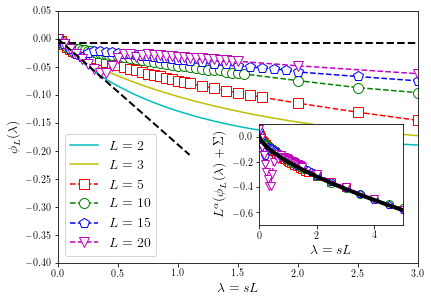

In [221]:
fig=plt.figure(figsize=(5,3.5))
ax1=fig.add_axes([0., 0., 1., 1.])
ax2=fig.add_axes([0.56,0.15,0.4,0.4])

p=0.2
x=np.arange(0,5.1,0.1)

ax1.set_xlim([0,3])
ax1.set_ylim([-0.4,0.05])
ax1.set_xlabel(r'$\lambda=sL$',fontsize=14)
ax1.set_ylabel(r'$\phi_L(\lambda)$',fontsize=14)


ax1.plot(data0['#s']*L[0],data0['PsiK']/(L[0]+2),'c-',markersize=10, markerfacecolor='white',label=r'$L='+str(L[0])+'$')
ax1.plot(data1['#s']*L[1],data1['PsiK']/(L[1]+2),'y-',markersize=10, markerfacecolor='white',label=r'$L='+str(L[1])+'$')
ax1.plot(data5['#s']*L[2],data5['PsiK']/(L[2]+2),'rs--',markersize=10, markerfacecolor='white',label=r'$L='+str(L[2])+'$')
ax1.plot(data10['#s']*L[3],data10['PsiK']/(L[3]+2),'go--',markersize=10, markerfacecolor='white',label=r'$L='+str(L[3])+'$')
ax1.plot(data15['#s']*L[4],data15['PsiK']/(L[4]+2),'bp--',markersize=10, markerfacecolor='white',label=r'$L='+str(L[4])+'$')
ax1.plot(data20['#s']*L[5],data20['PsiK']/(L[5]+2),'mv--',markersize=10, markerfacecolor='white',label=r'$L='+str(L[5])+'$')
ax1.plot(x,-1*sigma*np.ones(len(x)),'k--',lw=2)
ax1.plot(np.arange(0,1.2,0.1),-meanA*np.arange(0,1.2,0.1),'k--',lw=2)

ax1.legend(fontsize=14)


ax2.set_xlim([0,5])
ax2.set_ylim(-0.7,0.1)
ax2.set_xlabel(r'$\lambda=sL$',fontsize=14)
ax2.set_ylabel(r'$L^{\alpha}(\phi_L(\lambda)+\Sigma)$',fontsize=14)
#ax2.plot(data0['#s']*L[0],L[0]**a *(data0['PsiK']/(L[0]+2)+sigma),'c-',markersize=8)
#ax2.plot(data1['#s']*L[1],L[1]**a *(data1['PsiK']/(L[1]+2)+sigma),'y-',markersize=8)
ax2.plot(data5['#s']*L[2],L[2]**a *(data5['PsiK']/(L[2]+2)+sigma),'rs--',markersize=8, markerfacecolor='white')
ax2.plot(data10['#s']*L[3],L[3]**a *(data10['PsiK']/(L[3]+2)+sigma),'go--',markersize=8, markerfacecolor='white')
ax2.plot(data15['#s']*L[4],L[4]**a *(data15['PsiK']/(L[4]+2)+sigma),'bp--',markersize=8, markerfacecolor='white')
ax2.plot(data20['#s']*L[5],L[5]**a *(data20['PsiK']/(L[5]+2)+sigma),'mv--',markersize=8, markerfacecolor='white')
ax2.plot(x,-c*np.arange(0,5.1,0.1)**a,'k-',lw=4)

fig.savefig('psi'+model+'BC'+bc+'.pdf', bbox_inches='tight', pad_inches=0.02)

0.1458333333333333
0.0168 0.21


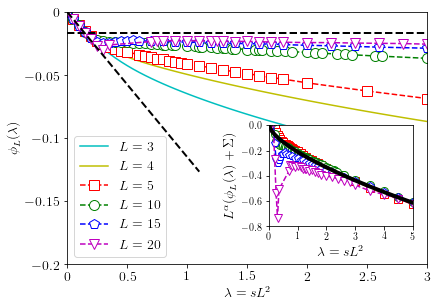

In [41]:
fig=plt.figure(figsize=(5,3.5))
ax1=fig.add_axes([0,0,1,1])
ax2=fig.add_axes([0.56,0.15,0.4,0.4])

p=0.2

x=np.arange(0,6,0.1)
ax1.set_xlim([0,3.0])
ax1.set_ylim([-0.2,0.])
ax1.set_xlabel(r'$\lambda=sL^2$',fontsize=14)
ax1.set_ylabel(r'$\phi_L(\lambda)$',fontsize=14)

ax1.plot(data0['#s']*L[0]**2,data0['PsiK'],'c-',markersize=10, markerfacecolor='white',label=r'$L='+str(L[0])+'$')
ax1.plot(data1['#s']*L[1]**2,data1['PsiK'],'y-',markersize=10, markerfacecolor='white',label=r'$L='+str(L[1])+'$')
ax1.plot(data5['#s']*L[2]**2,data5['PsiK'],'rs--',markersize=10, markerfacecolor='white',label=r'$L='+str(L[2])+'$')
ax1.plot(data10['#s']*L[3]**2,data10['PsiK'],'go--',markersize=10, markerfacecolor='white',label=r'$L='+str(L[3])+'$')
ax1.plot(data15['#s']*L[4]**2,data15['PsiK'],'bp--',markersize=10, markerfacecolor='white',label=r'$L='+str(L[4])+'$')
ax1.plot(data20['#s']*L[5]**2,data20['PsiK'],'mv--',markersize=10, markerfacecolor='white',label=r'$L='+str(L[5])+'$')

ax1.plot(x,-1*sigma*np.ones(len(x)),'k--',lw=2)
ax1.plot(np.arange(0,1.2,0.1),-meanA*np.arange(0,1.2,0.1),'k--',lw=2)

ax1.set_yticks([-0.2,-0.15,-0.1,-0.05,0])
ax1.set_yticklabels('$-0.2$ $-0.15$ $-0.1$ $-0.05$ $0$'.split(),fontsize=14)
ax1.set_xticklabels(labels=[r'$0$',r'$0.5$',r'$1$',r'$1.5$',r'$2$',r'$2.5$',r'$3$'],fontsize=14)
ax1.legend(fontsize=14,loc=3)


ax2.set_xlim([0,5.0])
ax2.set_ylim(-0.8,0.)
ax2.set_xlabel(r'$\lambda=sL^2$',fontsize=14)
ax2.set_ylabel(r'$L^{\alpha}(\phi_L(\lambda)+\Sigma)$',fontsize=14)
#ax2.plot(data0['#s']*L[0]**2,L[0]**a *(data0['PsiK']+sigma),'c-',markersize=8)
#ax2.plot(data1['#s']*L[1]**2,L[1]**a *(data1['PsiK']+sigma),'y-',markersize=8)
ax2.plot(data5['#s']*L[2]**2,L[2]**a *(data5['PsiK']+sigma),'rs--',markersize=8, markerfacecolor='white')
ax2.plot(data10['#s']*L[3]**2,L[3]**a *(data10['PsiK']+sigma),'go--',markersize=8, markerfacecolor='white')
ax2.plot(data15['#s']*L[4]**2,L[4]**a *(data15['PsiK']+sigma),'bp--',markersize=8, markerfacecolor='white')
ax2.plot(data20['#s']*L[5]**2,L[5]**a *(data20['PsiK']+sigma),'mv--',markersize=8, markerfacecolor='white')
ax2.plot(x,-c*np.arange(0,6,0.1)**(a/2),'k-',lw=4)
ax2.set_xticks([0,1,2,3,4,5])

fig.savefig('psi'+model+'BC'+bc+'.pdf', bbox_inches='tight', pad_inches=0.02)

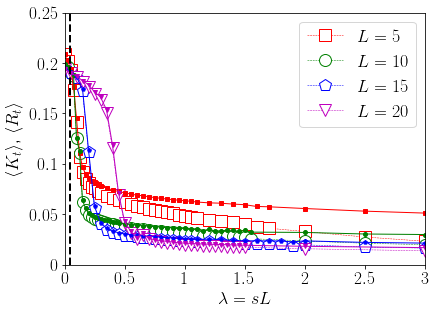

In [222]:
fig2=plt.figure(figsize=(5,3.5))
axA=fig2.add_axes([0,0,1,1])

x=np.arange(0,5,0.1)
axA.set_xlim([0,3])
axA.set_ylim([0,0.25])
axA.set_xlabel(r'$\lambda=sL$',fontsize=18)
axA.set_ylabel(r'$\langle K_t \rangle$, $\langle R_t \rangle$',fontsize=18)
axA.plot(lambdac,'k--')

if(bc=='0'):const1=1;const2=2
else: const1=2;const2=0

axA.set_yticks([0,0.05,0.1,0.15,0.2,0.25])
axA.set_yticklabels(labels=[r'$0$',r'$0.05$',r'$0.1$',r'$0.15$',r'$0.2$',r'$0.25$'],fontsize='xx-large')
axA.set_xticklabels(labels=[r'$0$',r'$0.5$',r'$1$',r'$1.5$',r'$2$',r'$2.5$',r'$3$'],fontsize='xx-large')



axA.plot(data5['#s']*L[2]**const1,data5['<K>']/(L[2]*(L[2]+const2)),'rs--',markersize=12,lw=0.5, markerfacecolor='white',label=r'$L='+str(L[2])+'$')
axA.plot(data10['#s']*L[3]**const1,data10['<K>']/(L[3]*(L[3]+const2)),'go--',markersize=12,lw=0.5, markerfacecolor='white',label=r'$L='+str(L[3])+'$')
axA.plot(data15['#s']*L[4]**const1,data15['<K>']/(L[4]*(L[4]+const2)),'bp--',markersize=12,lw=0.5, markerfacecolor='white',label=r'$L='+str(L[4])+'$')
axA.plot(data20['#s']*L[5]**const1,data20['<K>']/(L[5]*(L[5]+const2)),'mv--',markersize=12,lw=0.5, markerfacecolor='white',label=r'$L='+str(L[5])+'$')

axA.plot(data5['#s']*L[2]**const1,data5['<R>']/(L[2]*(L[2]+const2)),'rs-',lw=1,markersize=4,label='')
axA.plot(data10['#s']*L[3]**const1,data10['<R>']/(L[3]*(L[3]+const2)),'go-',lw=1,markersize=4,label='')
axA.plot(data15['#s']*L[4]**const1,data15['<R>']/(L[4]*(L[4]+const2)),'bp-',lw=1,markersize=4,label='')
axA.plot(data20['#s']*L[5]**const1,data20['<R>']/(L[5]*(L[5]+const2)),'mv-',lw=1,markersize=4,label='')

axA.axvline(x=lambdac,ymin=0,ymax=1,lw=2,color='k',ls='dashed')


axA.legend(fontsize=18)

fig2.savefig('activity'+model+'BC'+bc+'.pdf', bbox_inches='tight', pad_inches=0.02)

In [230]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.pyplot as plt
import pandas as pn
import numpy as np
%matplotlib inline

L=[5,10,15,20]
model='NE'
bc='1'
n=600
t=600

#PLOT FOR BC1:
if(bc=='0'):    a=2./3
else:    a=4./3
    
if (bc=='0'):
    sigma=0.008; c=0.2;meanA=(4*p-6*p**2 +4*p**3 -p**4 )*(2*p*(1.-p))
elif(bc=='1'):
    if(model=='FA'): sigma=0.023; c=0.18;meanA=(4*p-6*p**2 +4*p**3 -p**4 )*(2*p*(1.-p))
    else: sigma=0.0168; c=0.21; meanA=2*p**2 *(2.- p)*(1.- p)

lambdac=sigma/meanA

def name_file(content,l):
    return 'dataFiles/'+content+model+'BC'+bc+'N'+str(n)+'L'+str(l)+'iters200c20tmax'+str(t)+'.dat'

n5=pn.read_csv(name_file('momentsofn',L[0]),sep="\s+")
n10=pn.read_csv(name_file('momentsofn',L[1]),sep="\s+")
n15=pn.read_csv(name_file('momentsofn',L[2]),sep="\s+")
n20=pn.read_csv(name_file('momentsofn',L[3]),sep="\s+")
n5.head()

,s,fromrho,n0,v0,n1,v1,n2,v2,n3,v3,n4,v4
0,0.000,0,6.440544,2.053536,6.446610,2.054272,6.445995,2.054778,6.444257,2.053048,6.445920,2.051451
1,0.004,0,6.252041,2.063341,6.252366,2.067858,6.259000,2.063898,6.259196,2.062972,6.257310,2.063608
2,0.008,0,6.003607,2.089424,6.013917,2.088604,6.013031,2.084012,6.005087,2.087525,6.004236,2.085737
3,0.008,0,6.003607,2.089424,6.013917,2.088604,6.013031,2.084012,6.005087,2.087525,6.004236,2.085737
4,0.012,0,5.656314,2.144058,5.647082,2.140303,5.640961,2.135944,5.640222,2.134566,5.648920,2.138075


0.1458333333333333
0.0168 0.21


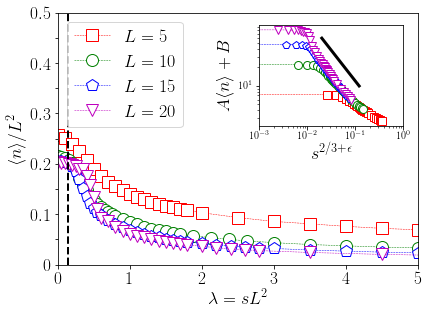

In [248]:
fig3=plt.figure(figsize=(5,3.5))
nex=fig3.add_axes([0., 0., 1., 1.])
nin=fig3.add_axes([0.56,0.55,0.4,0.4])

p=0.2

lambdac=sigma/meanA
print(lambdac)
print(sigma,c)

if(bc=='0'):const1=1;const2=2;exp1=(2/3)-0.3; A=10;B=10
elif(bc=='1'): 
    if(model=='FA'):const1=2;const2=0;exp1=(2/3)+0.1; A=10;B=10
    else:const1=2;const2=0;exp1=(2/3); A=1;B=1
    
nex.set_xlim([0,5])
nex.set_ylim([0,0.5])
nex.set_ylabel(r'$\langle n \rangle/L^2$',fontsize=18)
nex.set_xlabel(r'$\lambda=sL^2$',fontsize=18)

nex.set_yticks([0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5])
nex.set_yticklabels(labels=[r'$0$','',r'$0.1$','',r'$0.2$','',r'$0.3$','',r'$0.4$','',r'$0.5$'],fontsize='xx-large')
nex.set_xticklabels(labels=[r'$0$',r'$1$',r'$2$',r'$3$',r'$4$',r'$5$'],fontsize='xx-large')


nex.plot(n5['s']*L[0]**const1,n5['n4']/(L[0]*(L[0]+const2)),'rs--',linestyle='dashed',markersize=12, markerfacecolor='white',label=r'$L='+str(L[0])+'$',lw=0.5)
nex.plot(n10['s']*L[1]**const1,n10['n4']/(L[1]*(L[1]+const2)),'go--',linestyle='dashed',markersize=12, markerfacecolor='white',label=r'$L='+str(L[1])+'$',lw=0.5)
nex.plot(n15['s']*L[2]**const1,n15['n4']/(L[2]*(L[2]+const2)),'bp--',linestyle='dashed',markersize=12, markerfacecolor='white',label=r'$L='+str(L[2])+'$',lw=0.5)
nex.plot(n20['s']*L[3]**const1,n20['n4']/(L[3]*(L[3]+const2)),'mv--',linestyle='dashed',markersize=12, markerfacecolor='white',label=r'$L='+str(L[3])+'$',lw=0.5)
nex.axvline(x=lambdac,ymin=0,ymax=1,lw=2,color='k',ls='dashed')
nex.legend(fontsize=18,loc=2)

nin.set_xlim([0.001,1])
#nin.set_ylim([10,1000])
#nin.set_xticklabels(labels=[r'$10^{-1}$',r'$$','','','','','','','',r'$1$'])

nin.set_ylabel(r'$A\langle n \rangle +B$',fontsize=18)
nin.set_xlabel(r'$s^{2/3+\epsilon}$',fontsize=18)
nin.set_yscale('log')
nin.set_xscale('log')
nin.plot(n5['s']**exp1,A*n5['n4']+B,'rs--',linestyle='dashed',markersize=8, markerfacecolor='white',label=r'$L='+str(L[0])+'$',lw=0.5)
nin.plot(n10['s']**exp1,A*n10['n4']+B,'go--',linestyle='dashed',markersize=8, markerfacecolor='white',label=r'$L='+str(L[1])+'$',lw=0.5)
nin.plot(n15['s']**exp1,A*n15['n4']+B,'bp--',linestyle='dashed',markersize=8, markerfacecolor='white',label=r'$L='+str(L[2])+'$',lw=0.5)
nin.plot(n20['s']**exp1,A*n20['n4']+B,'mv--',linestyle='dashed',markersize=8, markerfacecolor='white',label=r'$L='+str(L[3])+'$',lw=0.5)
nin.plot(np.arange(0.02,0.15,0.05),1.2*np.arange(0.02,0.15,0.05)**(-1),'k-',lw=3)




fig3.savefig('meanofn'+model+'BC'+bc+'.pdf', bbox_inches='tight', pad_inches=0.02)

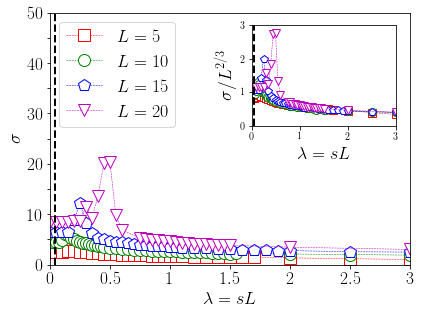

In [229]:
fig4=plt.figure(figsize=(5,3.5))
vex=fig4.add_axes([0., 0., 1., 1.])
vin=fig4.add_axes([0.56,0.55,0.4,0.4])


if(bc=='0'):const1=1;const2=2;exp2=2./3
elif(bc=='1'): 
    if(model=='FA'):const1=2;const2=0;exp2=1.3
    else:const1=2;const2=0;exp2=4/3
    
vex.set_xlim([0,3])
vex.set_ylim([0,40])
vex.set_ylabel(r'$\sigma$',fontsize=18)
vex.set_xlabel(r'$\lambda=sL$',fontsize=18)

vex.set_yticks([0,5,10,15,20,25,30,35,40,45,50])
vex.set_yticklabels(labels=[r'$0$','',r'$10$','',r'$20$','',r'$30$','',r'$40$','',r'$50$'],fontsize='xx-large')
vex.set_xticklabels(labels=[r'$0$',r'$0.5$',r'$1$',r'$1.5$',r'$2$',r'$2.5$',r'$3$'],fontsize='xx-large')


vex.plot(n5['s']*L[0]**const1,n5['v4'],'rs--',markersize=12,lw=0.5, markerfacecolor='white',label=r'$L='+str(L[0])+'$')
vex.plot(n10['s']*L[1]**const1,n10['v4'],'go--',markersize=12,lw=0.5, markerfacecolor='white',label=r'$L='+str(L[1])+'$')
vex.plot(n15['s']*L[2]**const1,n15['v4'],'bp--',markersize=12,lw=0.5, markerfacecolor='white',label=r'$L='+str(L[2])+'$')
vex.plot(n20['s']*L[3]**const1,n20['v4'],'mv--',markersize=12,lw=0.5, markerfacecolor='white',label=r'$L='+str(L[3])+'$')
vex.axvline(x=lambdac,ymin=0,ymax=1,lw=2,color='k',ls='dashed')
vex.legend(fontsize=18,loc=2)

vin.set_xlim([0,3])
vin.set_ylim([0.,3])
vin.set_ylabel(r'$\sigma/L^{2/3}$',fontsize=18)
vin.set_xlabel(r'$\lambda=sL$',fontsize=18)
vin.plot(n5['s']*L[0]**const1,n5['v4']/(L[0]**exp2),'rs--',markersize=8,lw=0.5, markerfacecolor='white',label=r'$L='+str(L[0])+'$')
vin.plot(n10['s']*L[1]**const1,n10['v4']/(L[1]**exp2),'go--',markersize=8,lw=0.5, markerfacecolor='white',label=r'$L='+str(L[1])+'$')
vin.plot(n15['s']*L[2]**const1,n15['v4']/(L[2]**exp2),'bp--',markersize=8,lw=0.5, markerfacecolor='white',label=r'$L='+str(L[2])+'$')
vin.plot(n20['s']*L[3]**const1,n20['v4']/(L[3]**exp2),'mv--',markersize=8,lw=0.5, markerfacecolor='white',label=r'$L='+str(L[3])+'$')
vin.axvline(x=lambdac,ymin=0,ymax=1,lw=2,color='k',ls='dashed')


fig4.savefig('varianceofn'+model+'BC'+bc+'.pdf', bbox_inches='tight', pad_inches=0.02)